# Analisando Dados da Produção Hospitalar

In [82]:
# Para usar as bibliotecas pandas e matplotlib é necessário fazer a instalação usando pip install no terminal
# pip install pandas
# pip install matplotlib

In [83]:
# Para usar o pandas, basta importar a biblioteca para seu projeto
import pandas as pd

In [84]:
# Carregamento dos dados do arquivo CSV "sih_cnv_qiuf094147179_101_158_151 (ano-mes-processamento).csv" para o DataFrame 'dados'.
# O arquivo é lido considerando a codificação ISO-8859-1 para suportar caracteres especiais europeus.
# As três primeiras linhas e as últimas 12 linhas são ignoradas para excluir cabeçalhos longos e rodapés, respectivamente, que não são parte dos dados analíticos.
# O delimitador de campos no arquivo é definido como ponto e vírgula (;), e o motor de leitura 'python' é utilizado para permitir a opção 'skipfooter'.
dados = pd.read_csv("sih_cnv_qiuf094221179_101_158_151 (ano-mes-atendimento).csv", 
                    encoding="ISO-8859-1", 
                    skiprows=3, 
                    skipfooter=12, 
                    sep=";", 
                    engine='python',
                    thousands=".",
                    decimal=",")

In [85]:
# primeiras 5 linhas do DataFrame
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,12505974.83,12009682.89,11892438.13,12737928.88,12068445.93,10814659.45,7839878.93,4969181.30,2434117.87,1394262146.50
1,12 Acre,-,-,-,-,-,-,-,-,-,...,4861672.52,5282731.30,4830246.24,4925043.24,4329288.81,4071963.23,3233614.21,1394717.40,-,587778407.94
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,22951007.22,22636889.89,22193955.78,21762872.97,16686364.04,17051515.93,14725982.12,11345788.28,4838198.31,2613559191.21
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,4915988.80,4097022.28,3814616.24,3180791.10,2362582.36,1585002.57,165184.76,91360.44,41945.05,451170144.15
4,15 Pará,-,-,-,-,-,-,-,-,-,...,52730367.64,49576192.93,49819035.62,52500501.45,51714821.84,51237171.71,49646581.93,32989201.74,13610385.98,6322687933.44


In [86]:
# últimas 5 linhas do DataFrame
dados.tail()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,Total
22,43 Rio Grande do Sul,-,-,-,-,-,-,-,-,-,...,119911799.35,114180633.26,114821469.38,120841672.92,114019622.04,116187553.64,101723680.10,79016335.07,35097902.08,16750147966.65
23,50 Mato Grosso do Sul,-,-,-,-,-,-,-,-,-,...,27012124.81,25980327.81,27408836.70,27761038.69,25897790.89,24356440.44,17975196.66,11104710.76,3622254.04,3219624366.70
24,51 Mato Grosso,-,-,-,-,-,-,-,-,-,...,24470787.76,22929285.47,23550934.50,24243689.65,22424730.11,21572148.20,18757993.99,13608235.28,7711923.78,2988456549.66
25,52 Goiás,-,-,-,-,-,-,-,-,-,...,50134061.74,47935572.72,49412906.09,49763873.98,48040227.82,47989959.81,45180102.56,35603860.42,18035437.49,6682626416.14
26,53 Distrito Federal,-,-,-,-,-,-,-,-,-,...,29919839.16,28337591.67,29544407.37,30864169.80,29636228.70,29776844.99,27785666.95,22830282.42,15359150.30,3543027009.96


In [87]:
# Ao executar o comando info() foi identificado que existem 3 colunas do tipo object. Na verdade, deveria existir apenas uma.
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 321 entries, Unidade da Federação to Total
dtypes: float64(198), object(123)
memory usage: 67.8+ KB


In [88]:
# Verifica os tipos de dados de cada coluna do DataFrame => float, numeric, object (string) entre outros
# Nesse caso, a coluna '2024/Jan' que deveria ser float foi apresentada como object
dados.dtypes

Unidade da Federação     object
1992/Mar                 object
1992/Abr                 object
1993/Mai                 object
1993/Dez                 object
                         ...   
2023/Out                float64
2023/Nov                float64
2023/Dez                float64
2024/Jan                 object
Total                   float64
Length: 321, dtype: object

In [89]:
# Aqui usamos o método 'select_dtypes' para listar colunas do tipo 'object'
# Descobrimos que as colunas '2009/Set' e '2024/Jan' são do tipo 'object'
colunas_object = dados.select_dtypes(include=['object']).columns

print("Colunas do tipo 'object':")
print(colunas_object)

Colunas do tipo 'object':
Index(['Unidade da Federação', '1992/Mar', '1992/Abr', '1993/Mai', '1993/Dez',
       '1994/Jan', '1994/Fev', '1994/Mai', '1994/Ago', '1994/Nov',
       ...
       '2006/Nov', '2006/Dez', '2007/Jan', '2007/Fev', '2007/Mar', '2007/Abr',
       '2007/Mai', '2007/Jun', '2007/Jul', '2024/Jan'],
      dtype='object', length=123)


In [90]:
# Executando o filtro apenas nas duas colunas, verificamos que é apresentado o caractere '-' na primeira linha
dados[colunas_object[1:]]

,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,...,2006/Nov,2006/Dez,2007/Jan,2007/Fev,2007/Mar,2007/Abr,2007/Mai,2007/Jun,2007/Jul,2024/Jan
0,-,-,-,-,-,-,-,-,-,-,...,-,-,-,604.33,-,-,-,-,-,2434117.87
1,-,-,-,-,-,-,-,-,-,-,...,-,-,184.65,-,-,-,-,1099.17,-,-
2,-,-,-,-,-,-,-,-,-,-,...,-,-,1134.83,951.89,-,531.94,-,-,212.75,4838198.31
3,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,413.69,-,41945.05
4,-,-,-,-,-,-,-,-,-,-,...,-,-,4994.86,2182.97,-,-,210.20,399.57,9487.90,13610385.98
5,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,1647.39,7754.72,12695.61,1802014.83
6,-,-,-,-,-,-,-,-,-,-,...,-,1122.46,-,578.69,-,-,-,34446.08,586.69,303117.03
7,-,-,-,-,-,-,-,-,-,-,...,-,-,2767.08,2871.13,-,295.36,7090.58,-,42360.79,10982397.14
8,-,-,-,-,-,-,-,-,-,-,...,-,-,-,162.01,-,-,428.77,-,12172.72,8855530.23
9,-,-,-,-,-,-,-,-,-,-,...,-,-,149.65,3186.33,-,-,-,-,3698.69,21259868.14


In [91]:
# Convertendo as colunas para numérico, transformando valores não convertíveis em NaN (Not a Number)
for coluna in colunas_object[1:]:
    dados[coluna] = pd.to_numeric(dados[coluna], errors='coerce')


In [92]:
# Após a conversão, Verificamos que existe apenas uma coluna do tipo object
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 321 entries, Unidade da Federação to Total
dtypes: float64(320), object(1)
memory usage: 67.8+ KB


In [93]:
dados[colunas_object].dtypes

Unidade da Federação     object
1992/Mar                float64
1992/Abr                float64
1993/Mai                float64
1993/Dez                float64
                         ...   
2007/Abr                float64
2007/Mai                float64
2007/Jun                float64
2007/Jul                float64
2024/Jan                float64
Length: 123, dtype: object

In [94]:
dados[colunas_object].head(10)

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2006/Nov,2006/Dez,2007/Jan,2007/Fev,2007/Mar,2007/Abr,2007/Mai,2007/Jun,2007/Jul,2024/Jan
0,11 Rondônia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,604.33,NaN,NaN,NaN,NaN,NaN,2434117.87
1,12 Acre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,184.65,NaN,NaN,NaN,NaN,1099.17,NaN,NaN
2,13 Amazonas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1134.83,951.89,NaN,531.94,NaN,NaN,212.75,4838198.31
3,14 Roraima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,413.69,NaN,41945.05
4,15 Pará,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4994.86,2182.97,NaN,NaN,210.20,399.57,9487.90,13610385.98
5,16 Amapá,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1647.39,7754.72,12695.61,1802014.83
6,17 Tocantins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1122.46,NaN,578.69,NaN,NaN,NaN,34446.08,586.69,303117.03
7,21 Maranhão,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2767.08,2871.13,NaN,295.36,7090.58,NaN,42360.79,10982397.14
8,22 Piauí,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,162.01,NaN,NaN,428.77,NaN,12172.72,8855530.23
9,23 Ceará,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,149.65,3186.33,NaN,NaN,NaN,NaN,3698.69,21259868.14


In [95]:
# Calcula a média apenas das colunas numéricas, ignorando as colunas não numéricas
# Usei para não gerar erro por conta da primeiro coluna de Unidade da Federação
dados.mean(numeric_only=True)

1992/Mar        40243.16
1992/Abr        11449.99
1993/Mai        34583.77
1993/Dez        68556.52
1994/Jan        39809.34
                ...     
2023/Out     64657967.71
2023/Nov     57001423.07
2023/Dez     45043722.01
2024/Jan     26069055.25
Total      8578335035.65
Length: 320, dtype: float64

In [96]:
# Configura a exibição de números flutuantes no Pandas para duas casas decimais.
# Usamos o código abaixo para evitar a exibição em notação científica (4540549e+08) na exibição de saída do comando .mean()
pd.options.display.float_format = "{:.2f}".format

In [97]:
dados.mean(numeric_only=True)

1992/Mar        40243.16
1992/Abr        11449.99
1993/Mai        34583.77
1993/Dez        68556.52
1994/Jan        39809.34
                ...     
2023/Out     64657967.71
2023/Nov     57001423.07
2023/Dez     45043722.01
2024/Jan     26069055.25
Total      8578335035.65
Length: 320, dtype: float64

# Visualização de Dados com MatPlotLib

<Axes: xlabel='Unidade da Federação'>

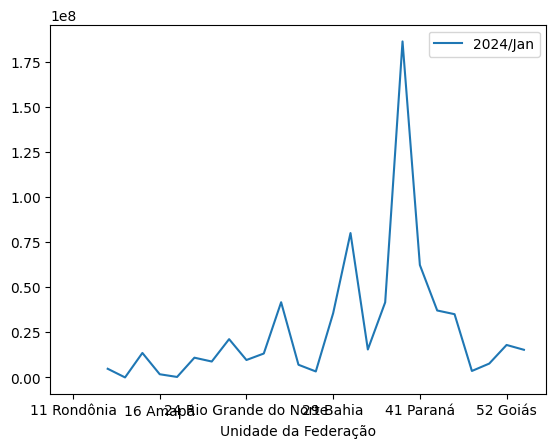

In [98]:
# exibe um gráfico de linhas (padrão) usando as colunas unidade da federação e 2024/Jan
dados.plot(x="Unidade da Federação", y="2024/Jan")

In [99]:
# Importa as bibliotecas necessárias para a criação e formatação de gráficos
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

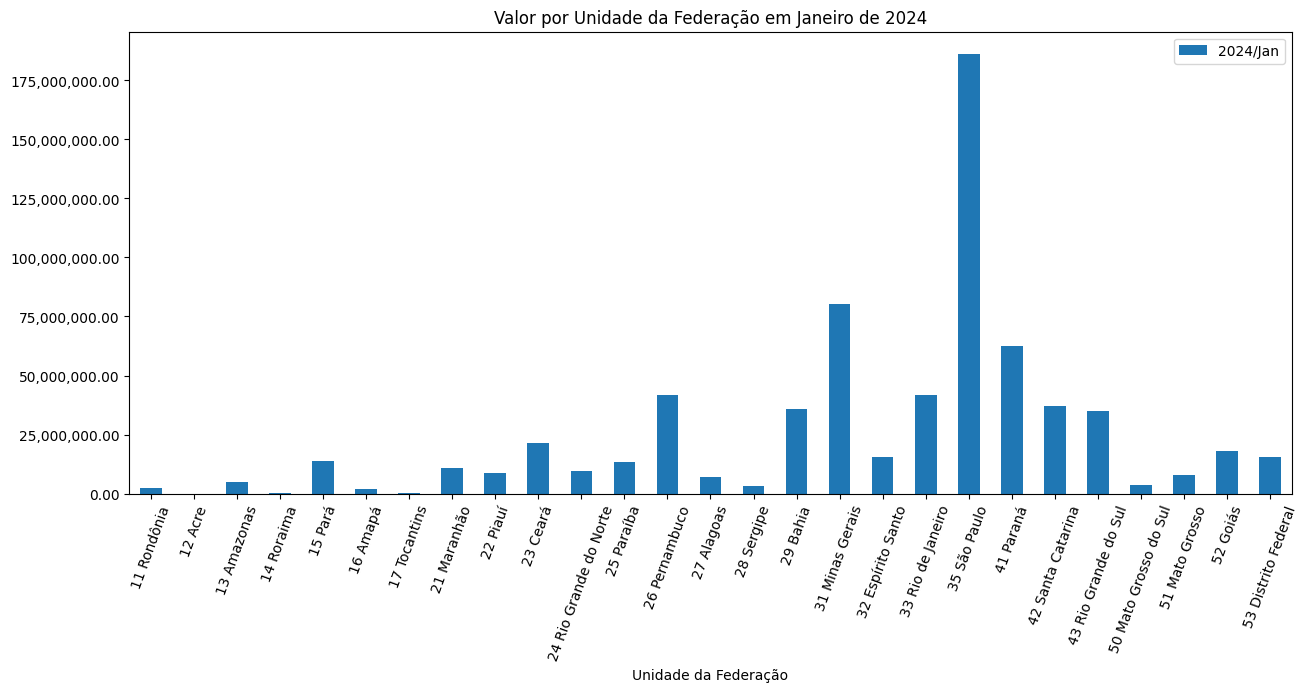

In [100]:
# Cria um gráfico de barras para visualizar os dados de '2024/Jan' por 'Unidade da Federação'.
# Configura o tamanho do gráfico através do parâmetro 'figsize'.
axis = dados.plot(x="Unidade da Federação", y="2024/Jan", kind="bar", figsize=(15,6))

# Configura o formato dos valores do eixo y para incluir separadores de milhar e decimais.
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

# Ajusta os rótulos do eixo x para ficarem em diagonal (45 graus, por exemplo)
#plt.xticks(rotation=70)

# Alternativamente, para uma abordagem mais customizada, você pode usar:
axis.set_xticklabels(axis.get_xticklabels(), rotation=70)

# Define o título do gráfico para melhor contextualização dos dados apresentados.
plt.title("Valor por Unidade da Federação em Janeiro de 2024")

# Exibe o gráfico configurado.
plt.show()

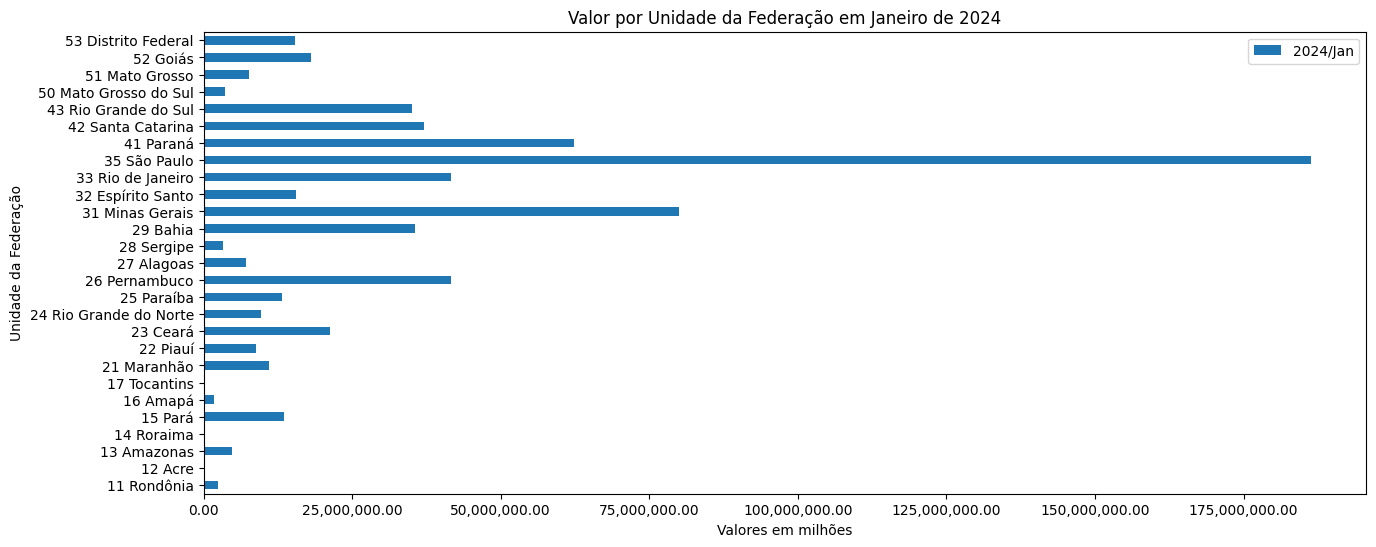

In [101]:
from matplotlib.ticker import FuncFormatter
# Sua função de formatação corrigida
def formatar_em_milhoes(x, pos):
    """Converte o valor 'x' em milhões e retorna como string."""
    return '%1.0f' % (x * 1e-6)

# Cria um gráfico de barras para visualizar os dados de '2024/Jan' por 'Unidade da Federação'.
# Configura o tamanho do gráfico através do parâmetro 'figsize'.
axis = dados.plot(x="Unidade da Federação", y="2024/Jan", kind="barh", figsize=(15,6))

# Configura o formato dos valores do eixo y para incluir separadores de milhar e decimais.
axis.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
#axis.xaxis.set_major_formatter(ticker.FuncFormatter(formatar_em_milhoes))

# Define o título do gráfico para melhor contextualização dos dados apresentados.
plt.title("Valor por Unidade da Federação em Janeiro de 2024")

plt.xlabel("Valores em milhões")

# Exibe o gráfico configurado.
plt.show()

In [102]:
dados[["2008/Ago","2008/Set"]].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


In [103]:
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,Total
0,11 Rondônia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12505974.83,12009682.89,11892438.13,12737928.88,12068445.93,10814659.45,7839878.93,4969181.30,2434117.87,1394262146.50
1,12 Acre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4861672.52,5282731.30,4830246.24,4925043.24,4329288.81,4071963.23,3233614.21,1394717.40,NaN,587778407.94
2,13 Amazonas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22951007.22,22636889.89,22193955.78,21762872.97,16686364.04,17051515.93,14725982.12,11345788.28,4838198.31,2613559191.21
3,14 Roraima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4915988.80,4097022.28,3814616.24,3180791.10,2362582.36,1585002.57,165184.76,91360.44,41945.05,451170144.15
4,15 Pará,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52730367.64,49576192.93,49819035.62,52500501.45,51714821.84,51237171.71,49646581.93,32989201.74,13610385.98,6322687933.44


In [104]:
colunas_object

Index(['Unidade da Federação', '1992/Mar', '1992/Abr', '1993/Mai', '1993/Dez',
       '1994/Jan', '1994/Fev', '1994/Mai', '1994/Ago', '1994/Nov',
       ...
       '2006/Nov', '2006/Dez', '2007/Jan', '2007/Fev', '2007/Mar', '2007/Abr',
       '2007/Mai', '2007/Jun', '2007/Jul', '2024/Jan'],
      dtype='object', length=123)

In [105]:
dados.columns

Index(['Unidade da Federação', '1992/Mar', '1992/Abr', '1993/Mai', '1993/Dez',
       '1994/Jan', '1994/Fev', '1994/Mai', '1994/Ago', '1994/Nov',
       ...
       '2023/Mai', '2023/Jun', '2023/Jul', '2023/Ago', '2023/Set', '2023/Out',
       '2023/Nov', '2023/Dez', '2024/Jan', 'Total'],
      dtype='object', length=321)

In [107]:
colunas_usaveis = set(dados.columns) - set(colunas_object)


In [112]:
colunas_usaveis = list(colunas_usaveis)
type(colunas_usaveis)

list